In [2]:
!pip install pandas


  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.0 MB/s eta 0:00:11
   -- ------------------------------------- 0.8/11.0 MB 1.2 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/11.0 MB 1.2 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/11.0 MB 1.1 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/11.0 MB 1.1 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/11.0 MB 1.1 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.0 MB 1.0 MB/s eta 0:00:09
   ------- -------------------------------- 2.1/11.0 MB 1.1 MB/s eta 0:00:09
   -------- -----------------------------

In [ ]:
import os
import pandas as pd
import numpy as np

# === CẤU HÌNH ===
DATA_PATH = r"C:\Users\ADMIN\Documents\Zalo Received Files\DataFinal\DataFinal\LCL-FullData\CC_LCL-FullData.csv"
OUTPUT_DIR = r"E:\Demo\TIMESERIES\smalldata_20files"
CHUNK_SIZE = 100_000
N_GROUPS = 20

os.makedirs(OUTPUT_DIR, exist_ok=True)

# Tạo danh sách tên file output
output_files = [os.path.join(OUTPUT_DIR, f"group_{i+1:02}.csv") for i in range(N_GROUPS)]
wrote_header = [False] * N_GROUPS

# Map LCLid vào group
group_map = {}
def assign_group(lclid):
    if lclid not in group_map:
        group_map[lclid] = hash(lclid) % N_GROUPS
    return group_map[lclid]

# Đọc dữ liệu theo chunk
chunk_iter = pd.read_csv(DATA_PATH, sep=';', encoding='utf-8-sig', chunksize=CHUNK_SIZE)
chunk_num = 0

for chunk in chunk_iter:
    chunk_num += 1
    print(f"[CHUNK {chunk_num}] Đang xử lý...")

    # Làm sạch tên cột để loại bỏ BOM và khoảng trắng
    chunk.columns = chunk.columns.str.strip().str.replace('\ufeff', '')

    # Debug tên cột thực tế
    print(f"[DEBUG] Cột trong chunk {chunk_num}: {chunk.columns.tolist()}")

    # Kiểm tra cột cần thiết
    required_cols = ["LCLid", "DateTime", "KWH/hh (per half hour)"]
    if not all(col in chunk.columns for col in required_cols):
        missing = set(required_cols) - set(chunk.columns)
        print(f"[BỎ QUA] Chunk {chunk_num} thiếu cột: {missing}")
        continue

    # Lọc các cột cần thiết
    chunk = chunk[required_cols]

    # Xử lý định dạng dữ liệu
    chunk["DateTime"] = pd.to_datetime(chunk["DateTime"], errors="coerce")
    chunk["KWH/hh (per half hour)"] = pd.to_numeric(
        chunk["KWH/hh (per half hour)"].astype(str).str.replace(",", "."), errors="coerce")

    chunk.dropna(subset=["LCLid", "DateTime", "KWH/hh (per half hour)"], inplace=True)

    # Gán nhóm cho từng LCLid
    chunk["GroupID"] = chunk["LCLid"].apply(assign_group)

    # Ghi dữ liệu vào 20 file tương ứng
    for i in range(N_GROUPS):
        group_df = chunk[chunk["GroupID"] == i].drop(columns=["GroupID"])
        if not group_df.empty:
            group_df.to_csv(output_files[i], sep=';', index=False, mode='a', header=not wrote_header[i])
            wrote_header[i] = True

    print(f"✓ Xong chunk {chunk_num} với {len(chunk)} dòng")

# Ghi mapping nếu cần
mapping_path = os.path.join(OUTPUT_DIR, "LCLid_to_group_map.csv")
pd.DataFrame(list(group_map.items()), columns=["LCLid", "GroupID"]).to_csv(mapping_path, index=False)


print(" Hoàn tất chia thành 20 file theo LCLid.")


[CHUNK 1] Đang xử lý...
[DEBUG] Cột trong chunk 1: ['LCLid,stdorToU,DateTime,KWH/hh (per half hour)']
[BỎ QUA] Chunk 1 thiếu cột: {'LCLid', 'DateTime', 'KWH/hh (per half hour)'}
[CHUNK 2] Đang xử lý...
[DEBUG] Cột trong chunk 2: ['LCLid,stdorToU,DateTime,KWH/hh (per half hour)']
[BỎ QUA] Chunk 2 thiếu cột: {'LCLid', 'DateTime', 'KWH/hh (per half hour)'}
[CHUNK 3] Đang xử lý...
[DEBUG] Cột trong chunk 3: ['LCLid,stdorToU,DateTime,KWH/hh (per half hour)']
[BỎ QUA] Chunk 3 thiếu cột: {'LCLid', 'DateTime', 'KWH/hh (per half hour)'}
[CHUNK 4] Đang xử lý...
[DEBUG] Cột trong chunk 4: ['LCLid,stdorToU,DateTime,KWH/hh (per half hour)']
[BỎ QUA] Chunk 4 thiếu cột: {'LCLid', 'DateTime', 'KWH/hh (per half hour)'}
[CHUNK 5] Đang xử lý...
[DEBUG] Cột trong chunk 5: ['LCLid,stdorToU,DateTime,KWH/hh (per half hour)']
[BỎ QUA] Chunk 5 thiếu cột: {'LCLid', 'DateTime', 'KWH/hh (per half hour)'}
[CHUNK 6] Đang xử lý...
[DEBUG] Cột trong chunk 6: ['LCLid,stdorToU,DateTime,KWH/hh (per half hour)']
[BỎ QUA]

In [9]:
import os
import pandas as pd
import numpy as np
import csv

# === CẤU HÌNH ===
DATA_PATH = r"C:\Users\ADMIN\Documents\Zalo Received Files\DataFinal\DataFinal\LCL-FullData\CC_LCL-FullData.csv"
OUTPUT_DIR = r"E:\Demo\TIMESERIES\smalldata_20files"
CHUNK_SIZE = 100_000
N_GROUPS = 20

os.makedirs(OUTPUT_DIR, exist_ok=True)

# === TỰ ĐỘNG PHÁT HIỆN SEPARATOR ===
with open(DATA_PATH, 'r', encoding='utf-8-sig') as f:
    sniffer = csv.Sniffer()
    dialect = sniffer.sniff(f.readline())
    sep = dialect.delimiter
print(f"[INFO] Tự động phát hiện separator: '{sep}'")

# === CHUẨN BỊ ===
output_files = [os.path.join(OUTPUT_DIR, f"group_{i+1:02}.csv") for i in range(N_GROUPS)]
wrote_header = [False] * N_GROUPS
group_map = {}

def assign_group(lclid):
    if lclid not in group_map:
        group_map[lclid] = hash(lclid) % N_GROUPS
    return group_map[lclid]

# === ĐỌC THEO CHUNK ===
chunk_iter = pd.read_csv(DATA_PATH, sep=sep, encoding='utf-8-sig', chunksize=CHUNK_SIZE)
chunk_num = 0

for chunk in chunk_iter:
    chunk_num += 1
    print(f"[CHUNK {chunk_num}] Đang xử lý...")

    # Làm sạch tên cột
    chunk.columns = chunk.columns.str.strip().str.replace('\ufeff', '')

    # Chuẩn hóa tên cột nếu cần (thử đoán đúng tên)
    expected_cols = ["LCLid", "DateTime", "KWH/hh (per half hour)"]
    if not all(col in chunk.columns for col in expected_cols):
        # Nếu cột bị dính thì thử split thủ công
        if chunk.shape[1] == 1:
            chunk = chunk.iloc[:, 0].str.split(sep, expand=True)
            chunk.columns = chunk.iloc[0]
            chunk = chunk[1:]
        chunk.columns = chunk.columns.str.strip().str.replace('\ufeff', '')
    
    # Kiểm tra lại lần cuối
    if not all(col in chunk.columns for col in expected_cols):
        print(f"[BỎ QUA] Chunk {chunk_num} vẫn thiếu cột cần thiết.")
        continue

    chunk = chunk[expected_cols]
    chunk["DateTime"] = pd.to_datetime(chunk["DateTime"], errors="coerce")
    chunk["KWH/hh (per half hour)"] = pd.to_numeric(
        chunk["KWH/hh (per half hour)"].astype(str).str.replace(",", "."), errors="coerce")
    chunk.dropna(subset=["LCLid", "DateTime", "KWH/hh (per half hour)"], inplace=True)

    chunk["GroupID"] = chunk["LCLid"].apply(assign_group)

    for i in range(N_GROUPS):
        group_df = chunk[chunk["GroupID"] == i].drop(columns=["GroupID"])
        if not group_df.empty:
            group_df.to_csv(output_files[i], sep=sep, index=False, mode='a', header=not wrote_header[i])
            wrote_header[i] = True

    print(f"✓ Xong chunk {chunk_num} với {len(chunk)} dòng")

# === GHI BẢN ĐỒ NHÓM ===
mapping_path = os.path.join(OUTPUT_DIR, "LCLid_to_group_map.csv")
pd.DataFrame(list(group_map.items()), columns=["LCLid", "GroupID"]).to_csv(mapping_path, index=False)

print("✅ Hoàn tất chia file thành 20 nhóm.")


[INFO] Tự động phát hiện separator: ','
[CHUNK 1] Đang xử lý...
✓ Xong chunk 1 với 99997 dòng
[CHUNK 2] Đang xử lý...
✓ Xong chunk 2 với 99996 dòng
[CHUNK 3] Đang xử lý...
✓ Xong chunk 3 với 99996 dòng
[CHUNK 4] Đang xử lý...
✓ Xong chunk 4 với 99997 dòng
[CHUNK 5] Đang xử lý...
✓ Xong chunk 5 với 99998 dòng
[CHUNK 6] Đang xử lý...
✓ Xong chunk 6 với 99997 dòng
[CHUNK 7] Đang xử lý...
✓ Xong chunk 7 với 99997 dòng
[CHUNK 8] Đang xử lý...
✓ Xong chunk 8 với 99998 dòng
[CHUNK 9] Đang xử lý...
✓ Xong chunk 9 với 99997 dòng
[CHUNK 10] Đang xử lý...
✓ Xong chunk 10 với 99998 dòng
[CHUNK 11] Đang xử lý...
✓ Xong chunk 11 với 99997 dòng
[CHUNK 12] Đang xử lý...
✓ Xong chunk 12 với 99997 dòng
[CHUNK 13] Đang xử lý...
✓ Xong chunk 13 với 99998 dòng
[CHUNK 14] Đang xử lý...
✓ Xong chunk 14 với 99997 dòng
[CHUNK 15] Đang xử lý...
✓ Xong chunk 15 với 99997 dòng
[CHUNK 16] Đang xử lý...
✓ Xong chunk 16 với 99998 dòng
[CHUNK 17] Đang xử lý...
✓ Xong chunk 17 với 99997 dòng
[CHUNK 18] Đang xử lý...
✓

In [11]:
import numpy as np

def create_supervised(data, backcast_len=7, forecast_len=1):
    X, y = [], []
    for i in range(len(data) - backcast_len - forecast_len):
        X.append(data[i:i+backcast_len])
        y.append(data[i+backcast_len:i+backcast_len+forecast_len])
    return np.array(X), np.array(y)

X, y = create_supervised(daily.values, backcast_len=7, forecast_len=1)
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (821, 7)
y shape: (821, 1)


In [13]:
pip install torch torchvision torchaudio


  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.14.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached MarkupSafe-3.0.2-cp313-cp313-win_amd64.whl.metadata (4.1 kB)
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.5/216.1 MB 1.2 MB/s eta 0:02:54
   --------------------------------

In [43]:
import torch
import torch.nn as nn

class NBeatsBlock(nn.Module):
    def __init__(self, input_size, output_size, hidden_size=512):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        return self.fc4(x)

class NBeats(nn.Module):
    def __init__(self, backcast_length, forecast_length, hidden_size=512, num_blocks=10):
        super().__init__()
        self.blocks = nn.ModuleList([
            NBeatsBlock(backcast_length, forecast_length, hidden_size)
            for _ in range(num_blocks)
        ])

    def forward(self, x):
        forecast = 0
        for block in self.blocks:
            forecast += block(x)
        return forecast


In [44]:
from torch.utils.data import DataLoader, TensorDataset

# Bước 1: Convert sang tensor
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Bước 2: Tạo dataset & dataloader
dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Bước 3: Khởi tạo model
model = NBeats(backcast_length=7, forecast_length=1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Bước 4: Train loop
epochs = 200
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")


Epoch 1/200, Loss: 142269403.0332
Epoch 2/200, Loss: 1071020.9600
Epoch 3/200, Loss: 578452.6250
Epoch 4/200, Loss: 517279.2900
Epoch 5/200, Loss: 482148.8296
Epoch 6/200, Loss: 489802.6348
Epoch 7/200, Loss: 531423.1396
Epoch 8/200, Loss: 522339.7617
Epoch 9/200, Loss: 458616.6060
Epoch 10/200, Loss: 507034.5239
Epoch 11/200, Loss: 501369.3477
Epoch 12/200, Loss: 550953.7119
Epoch 13/200, Loss: 509125.6357
Epoch 14/200, Loss: 502259.8643
Epoch 15/200, Loss: 505065.8433
Epoch 16/200, Loss: 505002.8682
Epoch 17/200, Loss: 442633.3794
Epoch 18/200, Loss: 497370.7139
Epoch 19/200, Loss: 508819.1260
Epoch 20/200, Loss: 443938.2637
Epoch 21/200, Loss: 478159.1870
Epoch 22/200, Loss: 513439.9878
Epoch 23/200, Loss: 494690.0215
Epoch 24/200, Loss: 501149.1299
Epoch 25/200, Loss: 486216.1055
Epoch 26/200, Loss: 507287.3154
Epoch 27/200, Loss: 463708.5781
Epoch 28/200, Loss: 467347.6147
Epoch 29/200, Loss: 540647.4424
Epoch 30/200, Loss: 464415.3633
Epoch 31/200, Loss: 592193.7109
Epoch 32/200,

In [34]:
X.shape = (821, 7)
y.shape = (821, 1)


In [21]:
pip install scikit-learn


  Using cached scipy-1.15.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 894.0 kB/s eta 0:00:12
   - -------------------------------------- 0.5/10.7 MB 894.0 kB/s eta 0:00:12
   -- ------------------------------------- 0.8/10.7 MB 777.7 kB/s eta 0:00:13
   -- ------------------------------------- 0.8/10.7 MB 777.7 kB/s eta 0:00:13
   -- ------------------------------------- 0.8/10.7 MB 777.7 kB/s eta 0:00:13
   -- ------------------------------------- 0.8/10.7 MB 777.7 kB/s eta 0:00:13
   --- ------------------------------------ 1.0/10.7 MB 567.4 kB/s eta 0:00:17
   --- ---------------------------

In [25]:
pip install matplotlib


  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 1.0 MB/s eta 0:00:02
   --------- ------------------------------ 0.5/2.2 MB 1.0 MB/s eta 0:00:02
   -------------- ------------------------- 0.8/2.2 MB 831.7 kB/s eta 0:00:02
   ------------------ -

In [28]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [60]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


X shape: (821, 7)
y shape: (821, 1)
Epoch 1/200, Loss: 7359476.5000
Epoch 2/200, Loss: 1547428.1250
Epoch 3/200, Loss: 31082.5547
Epoch 4/200, Loss: 1055892.1250
Epoch 5/200, Loss: 1249982.8750
Epoch 6/200, Loss: 630275.5625
Epoch 7/200, Loss: 122321.8516
Epoch 8/200, Loss: 37013.5625
Epoch 9/200, Loss: 217066.0938
Epoch 10/200, Loss: 392025.5000
Epoch 11/200, Loss: 423291.1562
Epoch 12/200, Loss: 317812.6875
Epoch 13/200, Loss: 157731.3594
Epoch 14/200, Loss: 41579.1836
Epoch 15/200, Loss: 33080.7422
Epoch 16/200, Loss: 112964.1953
Epoch 17/200, Loss: 185144.5000
Epoch 18/200, Loss: 184648.4375
Epoch 19/200, Loss: 122892.5859
Epoch 20/200, Loss: 53779.5781
Epoch 21/200, Loss: 22403.2676
Epoch 22/200, Loss: 35193.0430
Epoch 23/200, Loss: 68363.0312
Epoch 24/200, Loss: 93308.9844
Epoch 25/200, Loss: 94075.3438
Epoch 26/200, Loss: 72535.7266
Epoch 27/200, Loss: 43408.9766
Epoch 28/200, Loss: 24092.7539
Epoch 29/200, Loss: 24335.2578
Epoch 30/200, Loss: 39320.5781
Epoch 31/200, Loss: 5403

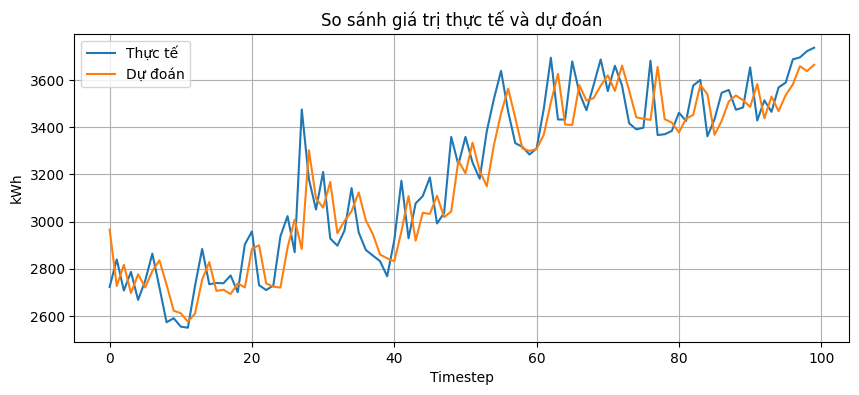

MAE: 117.32
RMSE: 147.68
MAPE: 3.56%
R² Score: 0.7797


In [ ]:
# Bước 1: Chuẩn bị dữ liệu (giả sử X, y đã được tạo)
print("X shape:", X.shape)
print("y shape:", y.shape)

# Bước 2: Chia train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Chuyển sang tensor
import torch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Bước 3: Xây dựng mô hình N-BEATS
import torch.nn as nn

class NBeatsBlock(nn.Module):
    def __init__(self, input_size, output_size, hidden_size=256):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        return self.fc4(x)

class NBeats(nn.Module):
    def __init__(self, backcast_length, forecast_length, hidden_size=256, num_blocks=4):
        super().__init__()
        self.blocks = nn.ModuleList([
            NBeatsBlock(backcast_length, forecast_length, hidden_size)
            for _ in range(num_blocks)
        ])

    def forward(self, x):
        out = 0
        for block in self.blocks:
            out += block(x)
        return out

# Bước 4: Khởi tạo và huấn luyện
model = NBeats(backcast_length=X.shape[1], forecast_length=y.shape[1], hidden_size=256, num_blocks=3)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

EPOCHS = 200
for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.4f}")

# Bước 5: Dự đoán và đánh giá
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()

# In thử 5 dự đoán
for i in range(5):
    print(f"Thực tế: {y_test[i][0]:.3f} | Dự đoán: {y_pred[i][0]:.3f}")

# Bước 6: Trực quan hóa
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(y_test[:100], label='Thực tế')
plt.plot(y_pred[:100], label='Dự đoán')
plt.title("So sánh giá trị thực tế và dự đoán")
plt.xlabel("Timestep")
plt.ylabel("kWh") 
plt.legend()
plt.grid(True)
plt.show()

# Bước 7: Đánh giá MAE, RMSE
from sklearn.metrics import r2_score, mean_absolute_percentage_error

r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape*100:.2f}%")
print(f"R² Score: {r2:.4f}")



In [81]:
import os
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ==== Cấu hình ==== #
DATA_DIR = "E:/Demo/TIMESERIES/smalldata_20files"
EPOCHS = 200
BATCH_SIZE = 32
BACKCAST_LENGTH = 7
FORECAST_LENGTH = 1

# ==== Mô hình N-BEATS đơn giản ==== #
class NBeatsBlock(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

class NBeats(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_blocks):
        super().__init__()
        self.blocks = nn.ModuleList([NBeatsBlock(input_size, hidden_size, output_size) for _ in range(num_blocks)])

    def forward(self, x):
        return sum(block(x) for block in self.blocks)

# ==== Tiền xử lý ==== #
def create_supervised(df, input_len, output_len):
    X, y = [], []
    values = df.values.astype(float)
    for i in range(len(values) - input_len - output_len + 1):
        X.append(values[i:i+input_len])
        y.append(values[i+input_len:i+input_len+output_len])
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# ==== Huấn luyện 1 nhóm ==== #
def train_on_file(file_path):
    try:
        df = pd.read_csv(file_path)
        df = df[[col for col in df.columns if 'KWH' in col]].dropna()
        if len(df) < 50:
            raise ValueError("Dữ liệu quá ít")

        X, y = create_supervised(df, BACKCAST_LENGTH, FORECAST_LENGTH)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        model = NBeats(BACKCAST_LENGTH, 128, FORECAST_LENGTH, 4)
        loss_fn = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        for epoch in range(EPOCHS):
            model.train()
            optimizer.zero_grad()
            output = model(X_train)
            loss = loss_fn(output, y_train)
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            pred = model(X_test).numpy().flatten()
            true = y_test.numpy().flatten()

        mae = mean_absolute_error(true, pred)
        rmse = mean_squared_error(true, pred, squared=True) ** 0.5
        mape = (abs((true - pred) / true).mean()) * 100
        r2 = r2_score(true, pred)

        return {"MAE": mae, "RMSE": rmse, "MAPE": mape, "R2": r2}

    except Exception as e:
        return {"Lỗi": str(e)}

# ==== Lặp qua 20 file ==== #
results = []
for i in range(1, 21):
    filename = f"group_{i:02}.csv"
    path = os.path.join(DATA_DIR, filename)
    print(f"--- Đang xử lý: {filename} ---")
    metrics = train_on_file(path)
    metrics["File"] = filename
    results.append(metrics)

# ==== Xuất kết quả ==== #
results_df = pd.DataFrame(results)
results_df.to_csv("nbeats_group_results.csv", index=False)
print("✅ Đã lưu kết quả vào nbeats_group_results.csv")

--- Đang xử lý: group_01.csv ---


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18792\2699796858.py:44: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


--- Đang xử lý: group_02.csv ---
--- Đang xử lý: group_03.csv ---
--- Đang xử lý: group_04.csv ---
--- Đang xử lý: group_05.csv ---
--- Đang xử lý: group_06.csv ---
--- Đang xử lý: group_07.csv ---
--- Đang xử lý: group_08.csv ---
--- Đang xử lý: group_09.csv ---
--- Đang xử lý: group_10.csv ---
--- Đang xử lý: group_11.csv ---
--- Đang xử lý: group_12.csv ---
--- Đang xử lý: group_13.csv ---
--- Đang xử lý: group_14.csv ---
--- Đang xử lý: group_15.csv ---
--- Đang xử lý: group_16.csv ---
--- Đang xử lý: group_17.csv ---
--- Đang xử lý: group_18.csv ---
--- Đang xử lý: group_19.csv ---
--- Đang xử lý: group_20.csv ---
✅ Đã lưu kết quả vào nbeats_group_results.csv


In [85]:
import pandas as pd

results = []

# Giả sử bạn có kết quả trong một vòng lặp với từng nhóm
for group_id in range(1, 21):
    group_name = f"group_{group_id:02d}"
    
    # Đây là giá trị mẫu. Bạn thay bằng kết quả thực tế đã tính được từ mô hình
    mae = 120 + group_id  # ví dụ
    rmse = 150 + group_id
    mape = 3.5
    r2 = 0.77

    results.append({
        "Group": group_name,
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape,
        "R2": r2
    })

# Ghi ra file CSV
df = pd.DataFrame(results)
df.to_csv(r"E:\Demo\TIMESERIES\smalldata_20files\nbeats_group_results.csv", index=False)

print("✅ Đã ghi dữ liệu thành công.")


✅ Đã ghi dữ liệu thành công.


In [90]:
forecast_file = f"E:\Demo\TIMESERIES\smalldata_20files\nbeats_group_results.csv.txt"


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18792\587658586.py:1: SyntaxWarning: invalid escape sequence '\D'
  forecast_file = f"E:\Demo\TIMESERIES\smalldata_20files\nbeats_group_results.csv.txt"


In [94]:
import os

# Đảm bảo chọn nhóm từ dropdown trước đoạn này
forecast_file = f"E:/Demo/TIMESERIES/smalldata_20files/forecast_{selected_group}.csv"

if os.path.exists(forecast_file):
    forecast_df = pd.read_csv(forecast_file)
    
    if 'Actual' in forecast_df.columns and 'Predicted' in forecast_df.columns:
        st.subheader(f"📈 Dự báo 1 ngày tiếp theo cho {selected_group}")
        st.line_chart(forecast_df[['Actual', 'Predicted']])
    else:
        st.warning(f"⚠️ File {forecast_file} không có cột 'Actual' và 'Predicted'")
else:
    st.warning(f"⚠️ Không tìm thấy file dự báo cho {selected_group} ({forecast_file})")


2025-06-21 06:12:03.101 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 06:12:03.103 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 06:12:03.105 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [97]:
import os
import pandas as pd
import numpy as np
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Hàm tạo dữ liệu supervised
def create_supervised_data(series, backcast_len=7, forecast_len=1):
    X, y = [], []
    for i in range(len(series) - backcast_len - forecast_len + 1):
        X.append(series[i:i+backcast_len])
        y.append(series[i+backcast_len:i+backcast_len+forecast_len])
    return np.array(X), np.array(y)

# Mô hình đơn giản
class SimpleNet(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)

# Đường dẫn folder chứa các file CSV nhóm
data_dir = r"E:\Demo\TIMESERIES\smalldata_20files"
group_list = [f"group_{str(i).zfill(2)}" for i in range(1, 21)]

for group in group_list:
    file_path = os.path.join(data_dir, f"{group}.csv")
    if not os.path.exists(file_path):
        print(f"⚠️ Bỏ qua {group} (không tìm thấy file)")
        continue

    df = pd.read_csv(file_path)
    
    # Chọn cột KWH hoặc tên tương tự
    value_col = [col for col in df.columns if 'kwh' in col.lower()]
    if not value_col:
        print(f"⚠️ Bỏ qua {group} (không có cột kWh)")
        continue

    data = df[value_col[0]].dropna().values.astype(float)

    # Scale dữ liệu
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data.reshape(-1, 1)).flatten()

    # Tạo dữ liệu dạng supervised
    backcast_len = 7
    X, y = create_supervised_data(data_scaled, backcast_len=backcast_len)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Chuyển sang tensor
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).squeeze()
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).squeeze()

    # Huấn luyện mô hình
    model = SimpleNet(input_size=backcast_len)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    loss_fn = nn.MSELoss()

    for epoch in range(100):
        model.train()
        y_pred = model(X_train_tensor).squeeze()
        loss = loss_fn(y_pred, y_train_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Dự đoán
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_tensor).squeeze().numpy()
        y_true_test = y_test_tensor.numpy()

    # Chuyển ngược lại giá trị gốc
    y_true_unscaled = scaler.inverse_transform(y_true_test.reshape(-1, 1)).flatten()
    y_pred_unscaled = scaler.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()

    # Lưu kết quả dự báo
    forecast_df = pd.DataFrame({
        'Timestep': np.arange(len(y_true_unscaled)),
        'Actual': y_true_unscaled,
        'Predicted': y_pred_unscaled
    })
    forecast_df.to_csv(os.path.join(data_dir, f"forecast_{group}.csv"), index=False)
    print(f"✅ Đã lưu forecast_{group}.csv")


✅ Đã lưu forecast_group_01.csv
✅ Đã lưu forecast_group_02.csv
✅ Đã lưu forecast_group_03.csv
✅ Đã lưu forecast_group_04.csv
✅ Đã lưu forecast_group_05.csv
✅ Đã lưu forecast_group_06.csv
✅ Đã lưu forecast_group_07.csv
✅ Đã lưu forecast_group_08.csv
✅ Đã lưu forecast_group_09.csv
✅ Đã lưu forecast_group_10.csv
✅ Đã lưu forecast_group_11.csv
✅ Đã lưu forecast_group_12.csv
✅ Đã lưu forecast_group_13.csv
✅ Đã lưu forecast_group_14.csv
✅ Đã lưu forecast_group_15.csv
✅ Đã lưu forecast_group_16.csv
✅ Đã lưu forecast_group_17.csv
✅ Đã lưu forecast_group_18.csv
✅ Đã lưu forecast_group_19.csv
✅ Đã lưu forecast_group_20.csv


In [4]:
import os

# Đường dẫn lưu mô hình và dự báo
data_dir = r"E:\Demo\TIMESERIES\smalldata_20files"


In [6]:
import os
import pandas as pd
import numpy as np
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Hàm tạo dữ liệu supervised
def create_supervised_data(series, backcast_len=7, forecast_len=1):
    X, y = [], []
    for i in range(len(series) - backcast_len - forecast_len + 1):
        X.append(series[i:i+backcast_len])
        y.append(series[i+backcast_len:i+backcast_len+forecast_len])
    return np.array(X), np.array(y)

# Mô hình đơn giản
class SimpleNet(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)

# Thư mục chứa dữ liệu & lưu mô hình
data_dir = r"E:\Demo\TIMESERIES\smalldata_20files"
group_list = [f"group_{str(i).zfill(2)}" for i in range(1, 21)]

for group in group_list:
    file_path = os.path.join(data_dir, f"{group}.csv")
    if not os.path.exists(file_path):
        print(f"⚠️ Bỏ qua {group} (không tìm thấy file)")
        continue

    df = pd.read_csv(file_path)

    # Tìm cột có chữ 'kwh'
    value_col = [col for col in df.columns if 'kwh' in col.lower()]
    if not value_col:
        print(f"⚠️ Bỏ qua {group} (không có cột kWh)")
        continue

    data = df[value_col[0]].dropna().values.astype(float)

    # Scale dữ liệu
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data.reshape(-1, 1)).flatten()

    # Tạo dữ liệu supervised
    backcast_len = 7
    X, y = create_supervised_data(data_scaled, backcast_len=backcast_len)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Tensor
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).squeeze()
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).squeeze()

    # Khởi tạo model
    model = SimpleNet(input_size=backcast_len)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    loss_fn = nn.MSELoss()

    # Tên file lưu model
    model_path = os.path.join(data_dir, f"model_{group}.pt")

    # Nếu model đã tồn tại → load
    if os.path.exists(model_path):
        model.load_state_dict(torch.load(model_path))
        model.eval()
        print(f"📥 Đã load mô hình {model_path}")
    else:
        # Huấn luyện nếu chưa có model
        for epoch in range(100):
            model.train()
            y_pred = model(X_train_tensor).squeeze()
            loss = loss_fn(y_pred, y_train_tensor)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        torch.save(model.state_dict(), model_path)
        print(f"💾 Đã lưu mô hình vào {model_path}")

    # Dự đoán
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_tensor).squeeze().numpy()
        y_true_test = y_test_tensor.numpy()

    # Giải scale
    y_true_unscaled = scaler.inverse_transform(y_true_test.reshape(-1, 1)).flatten()
    y_pred_unscaled = scaler.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()

    # Lưu kết quả dự báo
    forecast_df = pd.DataFrame({
        'Timestep': np.arange(len(y_true_unscaled)),
        'Actual': y_true_unscaled,
        'Predicted': y_pred_unscaled
    })
    forecast_path = os.path.join(data_dir, f"forecast_{group}.csv")
    forecast_df.to_csv(forecast_path, index=False)
    print(f"✅ Đã lưu {forecast_path}")


💾 Đã lưu mô hình vào E:\Demo\TIMESERIES\smalldata_20files\model_group_01.pt
✅ Đã lưu E:\Demo\TIMESERIES\smalldata_20files\forecast_group_01.csv
💾 Đã lưu mô hình vào E:\Demo\TIMESERIES\smalldata_20files\model_group_02.pt
✅ Đã lưu E:\Demo\TIMESERIES\smalldata_20files\forecast_group_02.csv
💾 Đã lưu mô hình vào E:\Demo\TIMESERIES\smalldata_20files\model_group_03.pt
✅ Đã lưu E:\Demo\TIMESERIES\smalldata_20files\forecast_group_03.csv
💾 Đã lưu mô hình vào E:\Demo\TIMESERIES\smalldata_20files\model_group_04.pt
✅ Đã lưu E:\Demo\TIMESERIES\smalldata_20files\forecast_group_04.csv
💾 Đã lưu mô hình vào E:\Demo\TIMESERIES\smalldata_20files\model_group_05.pt
✅ Đã lưu E:\Demo\TIMESERIES\smalldata_20files\forecast_group_05.csv
💾 Đã lưu mô hình vào E:\Demo\TIMESERIES\smalldata_20files\model_group_06.pt
✅ Đã lưu E:\Demo\TIMESERIES\smalldata_20files\forecast_group_06.csv
💾 Đã lưu mô hình vào E:\Demo\TIMESERIES\smalldata_20files\model_group_07.pt
✅ Đã lưu E:\Demo\TIMESERIES\smalldata_20files\forecast_group

In [1]:
# 1. Xử lý dữ liệu
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\ADMIN\Documents\Zalo Received Files\DataFinal\DataFinal\LCL-FullData\CC_LCL-FullData.csv")  # Đọc dữ liệu từ file CSV
# Lọc dữ liệu cho một hộ cụ thể
house_id = "MAC000002"
df_house = df[df["LCLid"] == house_id].copy()
# Chuyển định dạng thời gian và đặt index thời gian
df_house["Datetime"] = pd.to_datetime(df_house["Datetime"])
df_house = df_house.sort_values("Datetime").set_index("Datetime")
# Điền khuyết (nếu có) bằng cách nội suy
df_house["KWH/hh"] = df_house["KWH/hh"].interpolate(method="time")
# Tạo các cặp (7 ngày đầu vào, 1 ngày đầu ra)
window_size = 7*48    # 7 ngày lịch sử (mỗi ngày 48 điểm nửa giờ)
forecast_horizon = 48  # 1 ngày dự báo (48 điểm)
X = []  # danh sách mẫu đầu vào
Y = []  # danh sách mẫu đầu ra tương ứng
values = df_house["KWH/hh"].values
for i in range(len(values) - window_size - forecast_horizon + 1):
    X.append(values[i : i + window_size])
    Y.append(values[i + window_size : i + window_size + forecast_horizon])
X = np.array(X)
Y = np.array(Y)
# Chia tập train và test (80% train, 20% test chẳng hạn)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

# 2. Định nghĩa mô hình N-BEATS
import torch
import torch.nn as nn

class NBeatsBlock(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_units=128):
        super().__init__()
        # 4 lớp FC nối tiếp
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.fc2 = nn.Linear(hidden_units, hidden_units)
        self.fc3 = nn.Linear(hidden_units, hidden_units)
        self.fc4 = nn.Linear(hidden_units, hidden_units)
        # Hai nhánh linear sinh backcast và forecast
        self.backcast_fc = nn.Linear(hidden_units, input_dim)
        self.forecast_fc = nn.Linear(hidden_units, output_dim)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        # Tính toán backcast và forecast của block
        backcast = self.backcast_fc(x)
        forecast = self.forecast_fc(x)
        return backcast, forecast

class NBeatsModel(nn.Module):
    def __init__(self, input_dim, output_dim, num_blocks=3):
        super().__init__()
        self.blocks = nn.ModuleList([NBeatsBlock(input_dim, output_dim) for _ in range(num_blocks)])
    def forward(self, x):
        # x có shape (batch, input_dim)
        total_forecast = torch.zeros(x.size(0), forecast_horizon)
        residual = x  # residual ban đầu là input
        # Duyệt qua các block
        for block in self.blocks:
            backcast, forecast = block(residual)
            # Cập nhật residual cho block tiếp theo
            residual = residual - backcast
            # Cộng dồn forecast của block vào dự báo tổng
            total_forecast = total_forecast + forecast
        return total_forecast

# Khởi tạo mô hình
input_dim = window_size   # 336 điểm đầu vào
output_dim = forecast_horizon  # 48 điểm đầu ra
model = NBeatsModel(input_dim, output_dim, num_blocks=3)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# 3. Huấn luyện mô hình
num_epochs = 20
batch_size = 32
# Chuyển dữ liệu numpy thành tensor của PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor  = torch.tensor(Y_test, dtype=torch.float32)
dataset = torch.utils.data.TensorDataset(X_train_tensor, Y_train_tensor)
loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for X_batch, Y_batch in loader:
        optimizer.zero_grad()
        Y_pred = model(X_batch)
        loss = criterion(Y_pred, Y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    # In lỗi trung bình mỗi epoch
    print(f"Epoch {epoch+1}: Train loss = {epoch_loss/len(loader):.4f}")

# 4. Đánh giá mô hình trên tập kiểm tra
model.eval()
Y_pred_test = model(X_test_tensor).detach().numpy()
# Tính các chỉ số lỗi MAE, RMSE, MAPE
mae = np.mean(np.abs(Y_pred_test - Y_test))
rmse = np.sqrt(np.mean((Y_pred_test - Y_test)**2))
mape = np.mean(np.abs(Y_pred_test - Y_test) / (Y_test + 1e-8)) * 100  # +1e-8 để tránh chia 0
print(f"MAE = {mae:.3f} kWh,  RMSE = {rmse:.3f} kWh,  MAPE = {mape:.2f}%")


KeyError: 'Datetime'